<a href="https://colab.research.google.com/github/varada-sandeep/DV_Tasks/blob/main/task4dv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Path to dataset files: /kaggle/input/pima-indians-diabetes-database


# Task
Load the dataset from "/kaggle/input/pima-indians-diabetes-database/diabetes.csv", display the first few rows and information about the dataset.

## Load the dataset

### Subtask:
Load the `diabetes.csv` file from the downloaded path into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame.



In [ ]:
import pandas as pd

df_diabetes = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

## Initial data exploration

### Subtask:
Display the first few rows and information about the dataset to understand its structure and content.


**Reasoning**:
Display the first few rows and information about the dataframe to understand its structure and content.



In [ ]:
display(df_diabetes.head())
df_diabetes.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Perform analysis

### Subtask:
Perform the analysis requested by the user. (Note: The user did not specify what analysis to perform, so I will wait for further instructions).


## Perform analysis

### Subtask:
Perform the analysis requested by the user. (Note: The user did not specify what analysis to perform, so I will wait for further instructions).


## Summary:

### Data Analysis Key Findings

*   The dataset contains 768 entries and 9 columns.
*   All columns have a non-null count of 768, indicating no missing values in the dataset.
*   The columns include 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', and 'Outcome'.
*   The data types are a mix of integer (`int64`) and float (`float64`).

### Insights or Next Steps

*   The dataset is ready for further analysis as it has been loaded successfully and has no missing values.
*   The next step is to specify the type of analysis to be performed on the dataset.



Scatterplot Matrix:


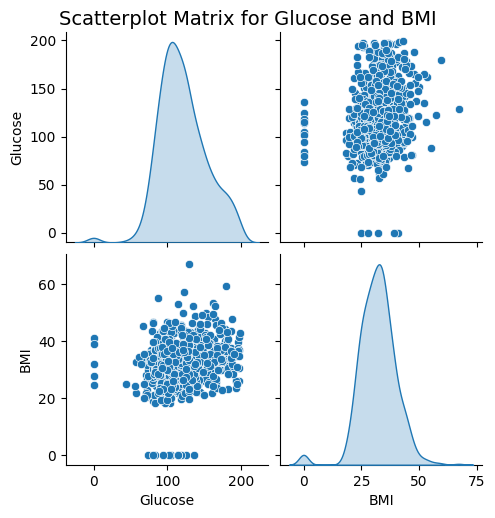

In [ ]:
print("\nScatterplot Matrix:")
sns.pairplot(df_diabetes[['Glucose', 'BMI']], diag_kind='kde', height=2.5)
plt.suptitle("Scatterplot Matrix for Glucose and BMI", y=1.02, fontsize=14)
plt.show()

In [ ]:
print("\nParallel Coordinates Plot:")

# For the parallel coordinates plot, let's use 'Outcome' as the color dimension
# as it represents the target variable (diabetes or not).
fig = px.parallel_coordinates(df_diabetes,
                              dimensions=['Glucose', 'BMI', 'Age', 'Insulin'],
                              color='Outcome',
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              labels={"Glucose": "Glucose", "BMI": "BMI", "Age": "Age", "Insulin": "Insulin", "Outcome": "Outcome"},
                              title="Parallel Coordinates Plot for Diabetes Dataset")
fig.show()


Parallel Coordinates Plot:


In [ ]:
import seaborn as sns
import plotly.express as px

In [ ]:
import matplotlib.pyplot as plt


Line Graph: Average Glucose vs. Age by Outcome:


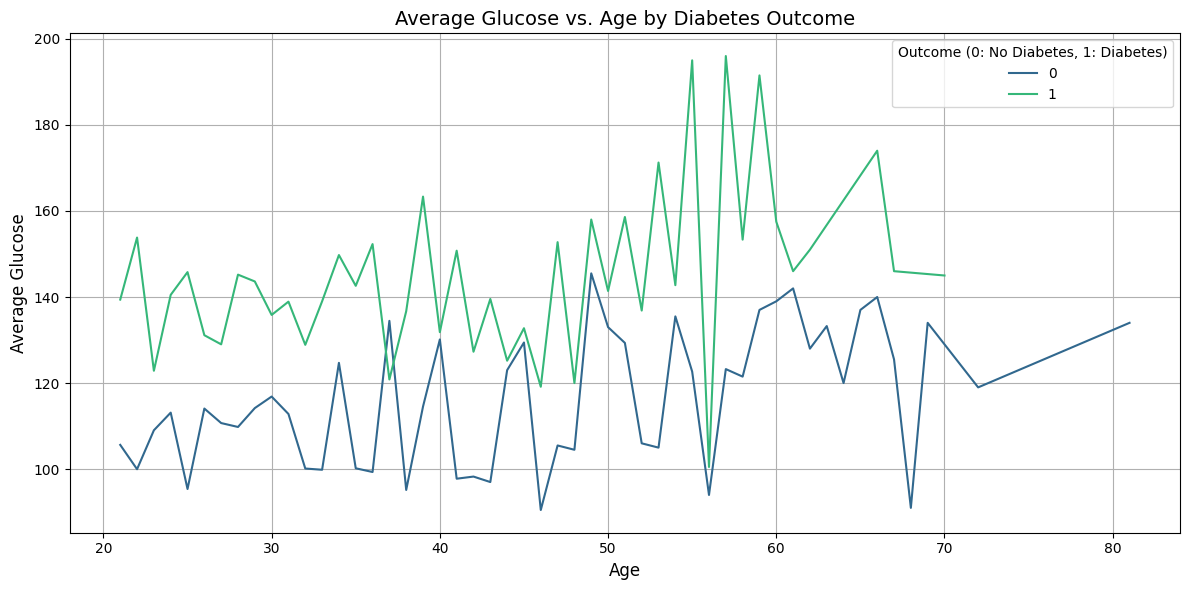

In [ ]:
# Group by Age and Outcome and calculate the mean Glucose
df_glucose_age = df_diabetes.groupby(['Age', 'Outcome'])['Glucose'].mean().reset_index()

print("\nLine Graph: Average Glucose vs. Age by Outcome:")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_glucose_age, x='Age', y='Glucose', hue='Outcome', palette='viridis')
plt.title('Average Glucose vs. Age by Diabetes Outcome', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Glucose', fontsize=12)
plt.legend(title='Outcome (0: No Diabetes, 1: Diabetes)')
plt.grid(True)
plt.tight_layout()
plt.show()


Stacked Bar Chart: Outcome Distribution by Pregnancies:


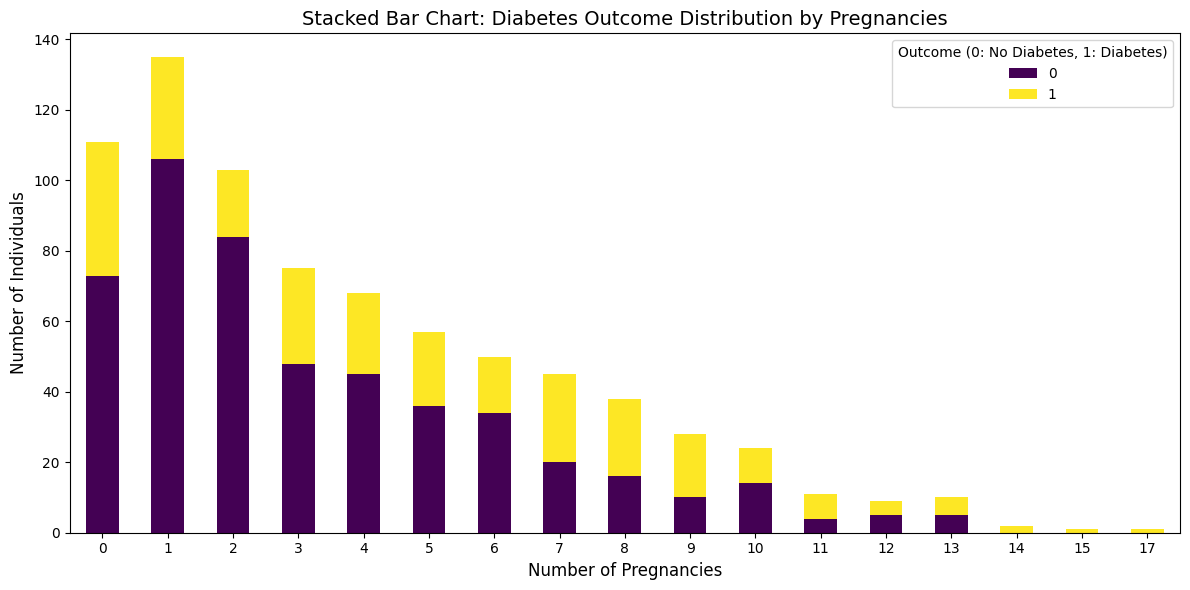

In [ ]:
print("\nStacked Bar Chart: Outcome Distribution by Pregnancies:")

# Group by Pregnancies and Outcome and count the occurrences
df_stacked_outcome = df_diabetes.groupby(['Pregnancies', 'Outcome']).size().unstack(fill_value=0)

df_stacked_outcome.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('Stacked Bar Chart: Diabetes Outcome Distribution by Pregnancies', fontsize=14)
plt.xlabel('Number of Pregnancies', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Outcome (0: No Diabetes, 1: Diabetes)')
plt.tight_layout()
plt.show()